optimizer = Adam, instead of RMSprop

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
print(os.getcwd())

data_dir = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Dataset'
data_dir_resized = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Resize '

Name = os.listdir(data_dir)
print(Name)
print(len(Name))
NameLabels = ['Control', 'Stroke']
print(NameLabels)
print(len(NameLabels))

N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project
['.DS_Store', 'Stroke', 'Control']
3
['Control', 'Stroke']
2


In [3]:
# ResNet and VGG preprocess_input will convert the input images from RGB to BGR, 
# then will zero-center each color channel with respect to the ImageNet dataset, without scaling
preprocess_input = tf.keras.applications.vgg19.preprocess_input

# Rescaling the input image
train_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [4]:
for image, label in train_generator:
      print(type(image))
      print(label)
      print(label[0])   # one-hot label
      print(NameLabels[np.argmax(label[0])])  # text label
      # print(NameLabels[np.argmax(label)])  # text label
      print(image[0].shape)
      break

<class 'numpy.ndarray'>
[1. 1. 0. 1. 1. 1.]
1.0
Control
(255, 255, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..-0.038976483].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..-0.09387845].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.45121962].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.2276902].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..-0.09780002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4497255..-0.11740786].


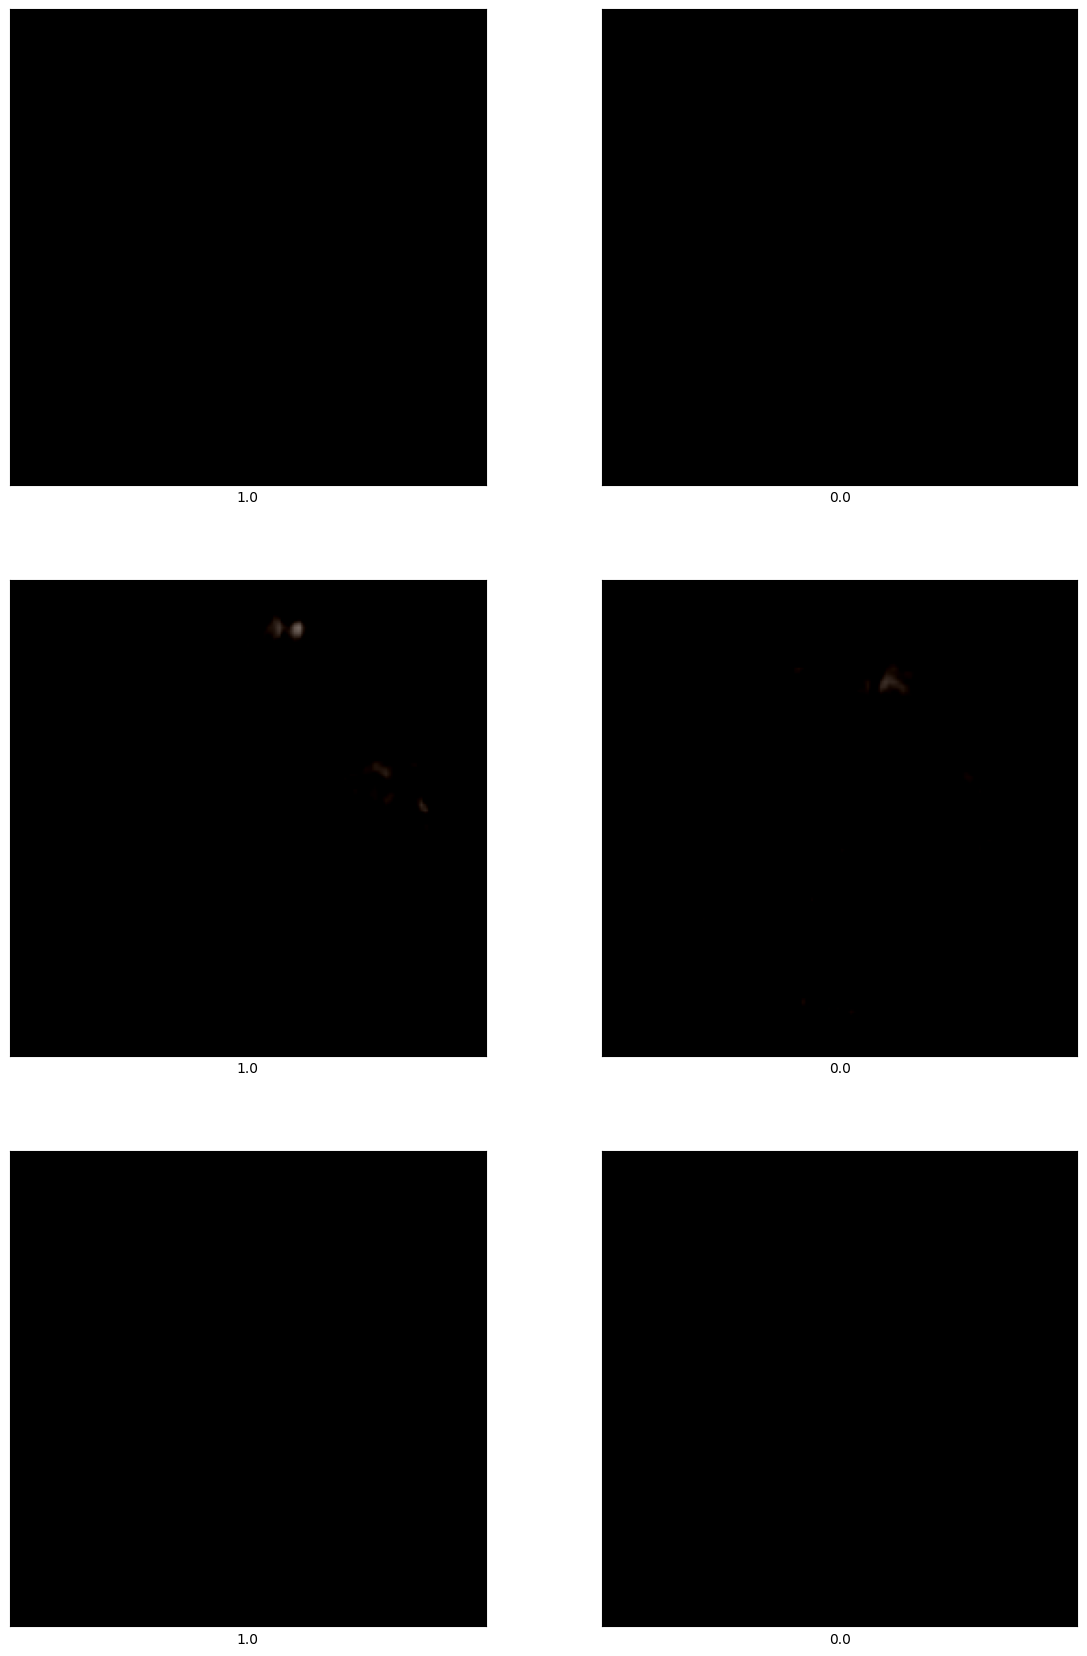

In [5]:
# browse some images
f = plt.figure(figsize=(14, 21))
for p in range(6):
    for image, label in train_generator:
        f.add_subplot(3,2,p+1)
        plt.imshow(image[p])
        # plt.title(NameLabels[np.argmax(label[p])])
        plt.xlabel(label[p], fontsize=10)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        break
plt.show()

# MODEL 0

simple CNN

In [6]:
model = tf.keras.Sequential()
# layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (255, 255, 3))) # image size is 224x224 with three layers for colors
model.add(layers.MaxPooling2D((2, 2)))
# layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
# layer 4
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
# layer 5
model.add(layers.Dense(1, activation= 'sigmoid'))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.build()

In [8]:
# model.summary()

In [9]:
model.compile(
    optimizer = Adam(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 109s 316ms/step - binary_accuracy: 0.5976 - loss: 4.7164 - val_binary_accuracy: 0.4988 - val_loss: 14.9689
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 102s 303ms/step - binary_accuracy: 0.6756 - loss: 0.5856 - val_binary_accuracy: 0.4638 - val_loss: 1.1058
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 96s 285ms/step - binary_accuracy: 0.6940 - loss: 0.5693 - val_binary_accuracy: 0.4988 - val_loss: 27.8326
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 106s 316ms/step - binary_accuracy: 0.7002 - loss: 0.5371 - val_binary_accuracy: 0.4988 - val_loss: 0.6966
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 100s 296ms/step - binary_accuracy: 0.4946 - loss: 0.6949 - val_binary_accuracy: 0.4988 - val_loss: 0.6939
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 112s 332ms/step - binary_accuracy: 0.5063 - loss: 0.6951 - val_binary_accuracy: 0.5012 - val_loss: 0.6934
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 106s 315ms/step - binary_accuracy: 0.4879 - loss: 0.6950 - val_binary_accuracy: 0.5012 - val_l

In [10]:
def plot_loss_accuracy(history, title):
  fig = plt.figure(figsize=(13, 6))
  plt.suptitle(f"Binary classifier, stroke detection based on  MRI images\n\n {title}", fontsize=14)
  ax1 = fig.add_subplot(1,2,1)
  plt.plot(history.history['binary_accuracy'], 'r', label='Training accuracy')
  plt.plot(history.history['val_binary_accuracy'], 'purple', label='Validation accuracy')
  plt.title('Training and validation accuracy', fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.xticks(range(0,30,2), labels=range(1,31,2))
  plt.legend(fontsize=12, loc=4)
  plt.grid(True, alpha=0.5)

  ax2 = fig.add_subplot(1,2,2)
  plt.plot(history.history['loss'], 'g', label='Training loss')
  plt.plot(history.history['val_loss'], 'b', label='Validation loss')
  plt.title('Training and validation loss', fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  handles, labels = plt.gca().get_legend_handles_labels()
  order = [1, 0]
  plt.xticks(range(0,30,2), labels=range(1,31,2))
  plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=12, loc=4) 
  plt.legend(fontsize=14, loc=7)
  plt.grid(True, alpha=0.4)
  plt.tight_layout()
  plt.show()

In [11]:
max(history.history['val_binary_accuracy'])

0.5012468695640564

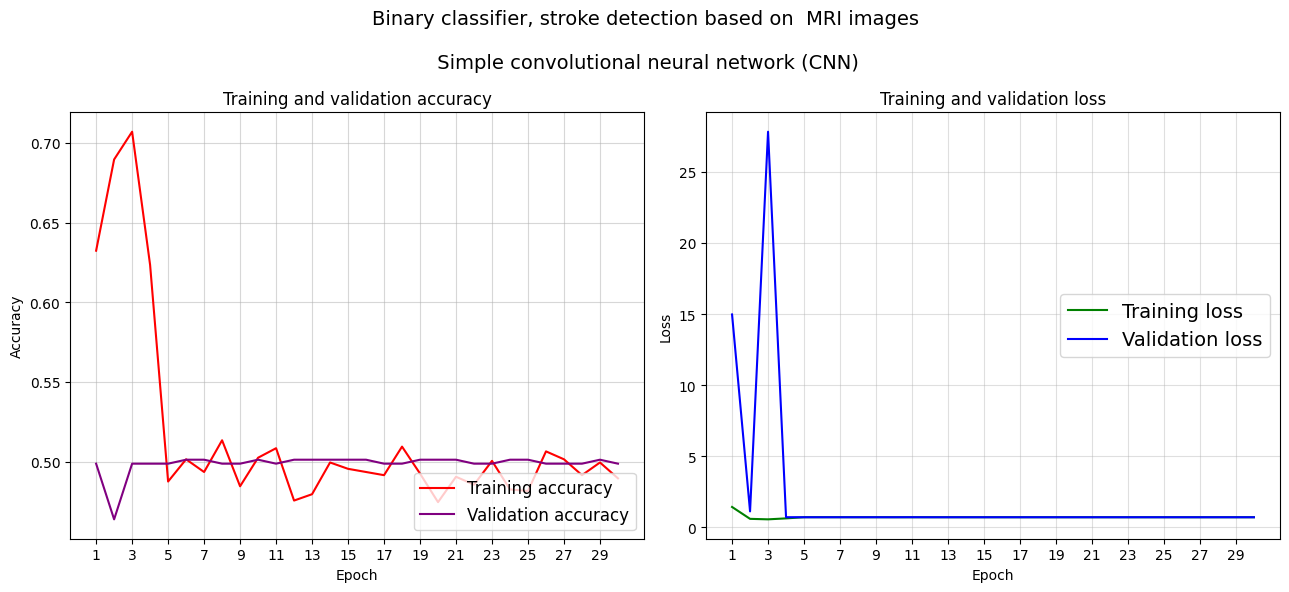

In [12]:
plot_loss_accuracy(history, "Simple convolutional neural network (CNN)")

the model quickly overfit. 

validation accuracy is in broad strokes only slightly better than random chance

# MODEL 1

#### updated simple CNN - model1

the updated simple CNN model is bigger, has an extra layer, more neurons, L2 regularization and dropout added and smaller learning rate

In [13]:
model1 = tf.keras.Sequential()
# layer 1
model1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (255, 255, 3))) 
model1.add(layers.MaxPooling2D((2, 2)))
# layer 2
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# layer 3
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# layer 4
model1.add(layers.Conv2D(512, (3, 3), activation='relu', use_bias=True,
    kernel_regularizer =tf.keras.regularizers.l2( 0.01)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
# layer 5
model1.add(layers.Dense(1024, activation='relu', use_bias=True,
    kernel_regularizer =tf.keras.regularizers.l2( 0.01)))
model1.add(Dropout(0.5))
# layer 6
model1.add(layers.Dense(1, activation= 'sigmoid'))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# model1.summary()

In [15]:
model1.compile(
    optimizer = Adam(learning_rate=1e-5), # 0.00001
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

history1 = model1.fit(
    train_generator,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 578s 2s/step - binary_accuracy: 0.5099 - loss: 19.4316 - val_binary_accuracy: 0.4988 - val_loss: 13.2620
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 524s 2s/step - binary_accuracy: 0.6590 - loss: 7.6156 - val_binary_accuracy: 0.4988 - val_loss: 12.9651
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 535s 2s/step - binary_accuracy: 0.6888 - loss: 3.8404 - val_binary_accuracy: 0.4988 - val_loss: 10.3987
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - binary_accuracy: 0.6958 - loss: 2.4995 - val_binary_accuracy: 0.4988 - val_loss: 10.2521
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 324s 967ms/step - binary_accuracy: 0.7314 - loss: 1.8569 - val_binary_accuracy: 0.4988 - val_loss: 6.5505
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 324s 964ms/step - binary_accuracy: 0.7281 - loss: 1.4877 - val_binary_accuracy: 0.6858 - val_loss: 1.4967
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 327s 975ms/step - binary_accuracy: 0.7742 - loss: 1.2073 - val_binary_accuracy: 0.6010 - va

In [16]:
max(history1.history['val_binary_accuracy'])

0.8678303956985474

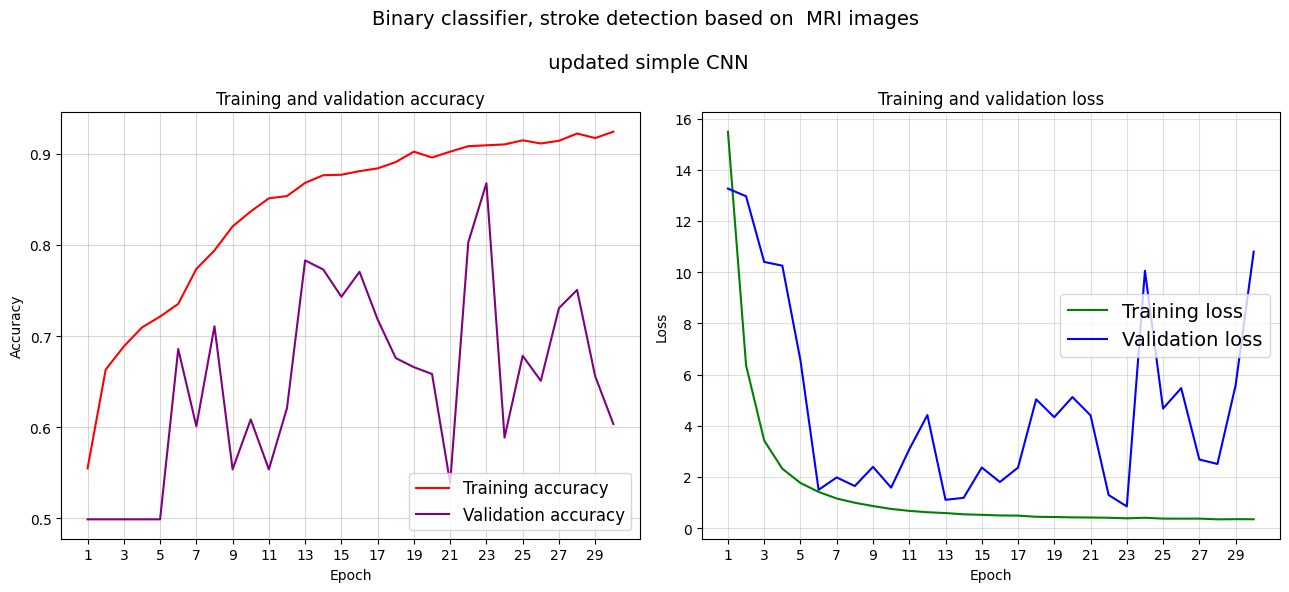

In [17]:
plot_loss_accuracy(history1, "updated simple CNN")

model1 did not overfit as fast as the original model, but the improvement was minor

# PRETRAINED MODELS

I explored four different pretrained models - VGG19, ResNet50, InceptionV3, EfficientNetB0 - and created two versions of each, while keepin the rest of the parameters same:
1. with all layers frozen and 
1. with 3 unfrozen layers

# MODEL 2

#### pretrained model VGG19 (Visual Geometry Group), all layers frozen, model2

In [18]:
# instantiating VGG19 convolutional base
pre_trained_model2 = keras.applications.vgg19.VGG19(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model2.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model2.summary()

In [19]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model2.get_layer('block5_pool')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [20]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [21]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model2 = Model(pre_trained_model2.input, outputs) 

# Print the model summary
# model2.summary()

In [22]:
model2.compile(
    optimizer = Adam(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model2.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history2 = model2.fit(
    train_generator,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 747s 2s/step - binary_accuracy: 0.5749 - loss: 0.9265 - val_binary_accuracy: 0.5985 - val_loss: 0.6922
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 742s 2s/step - binary_accuracy: 0.6108 - loss: 0.6405 - val_binary_accuracy: 0.5810 - val_loss: 0.6703
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 741s 2s/step - binary_accuracy: 0.6269 - loss: 0.6267 - val_binary_accuracy: 0.5661 - val_loss: 0.6702
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - binary_accuracy: 0.6591 - loss: 0.5949 - val_binary_accuracy: 0.5885 - val_loss: 0.6637
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - binary_accuracy: 0.6593 - loss: 0.6000 - val_binary_accuracy: 0.5960 - val_loss: 0.6523
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 733s 2s/step - binary_accuracy: 0.6890 - loss: 0.5742 - val_binary_accuracy: 0.6035 - val_loss: 0.6687
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 705s 2s/step - binary_accuracy: 0.7132 - loss: 0.5609 - val_binary_accuracy: 0.6334 - val_loss: 0.6342
Epoch 8/30

In [23]:
max(history2.history['val_binary_accuracy'])

0.7980049848556519

In [24]:
#the best model2
best_model2 = keras.models.load_model("model2.keras") 
val_loss, val_binary_acc = best_model2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - binary_accuracy: 0.7966 - loss: 0.4424
Validation accuracy: 0.798


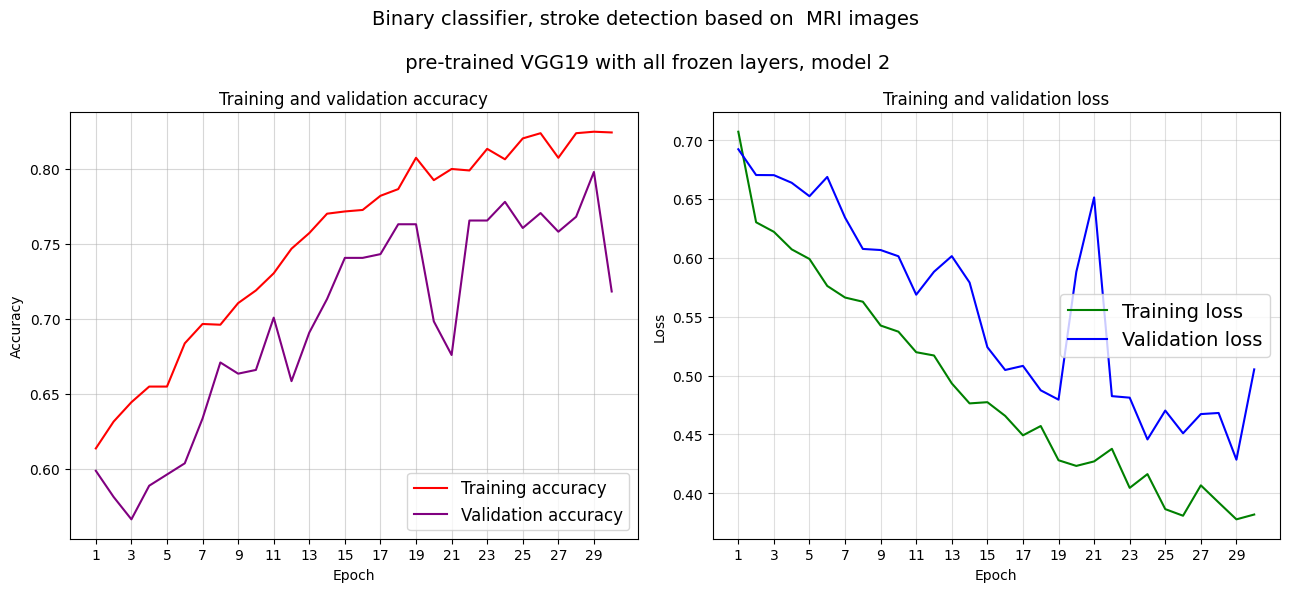

In [25]:
plot_loss_accuracy(history2, "pre-trained VGG19 with all frozen layers, model 2")

outcome of model2 was worse than the baseline

# MODEL 3

#### pretrained model VGG19 (Visual Geometry Group), 16 frozen and 3 unfrozen layers, model3

changed optimizer back to RMSprop

In [26]:
# instantiating VGG19 convolutional base
pre_trained_model3 = keras.applications.vgg19.VGG19(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the first 16 layers, leave last 3 trainable
pre_trained_model3.trainable = True
for layer in pre_trained_model3.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model3.summary()

In [27]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model3.get_layer('block5_pool')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [28]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [29]:
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model3 = Model(pre_trained_model3.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model3.summary()

In [30]:
model3.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model3_adam.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history3 = model3.fit(
    train_generator,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 778s 2s/step - binary_accuracy: 0.6038 - loss: 0.6579 - val_binary_accuracy: 0.6160 - val_loss: 0.6553
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 769s 2s/step - binary_accuracy: 0.7043 - loss: 0.5823 - val_binary_accuracy: 0.6808 - val_loss: 0.5966
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 702s 2s/step - binary_accuracy: 0.7559 - loss: 0.5006 - val_binary_accuracy: 0.7756 - val_loss: 0.5198
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 701s 2s/step - binary_accuracy: 0.7935 - loss: 0.4431 - val_binary_accuracy: 0.8155 - val_loss: 0.4414
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 699s 2s/step - binary_accuracy: 0.8475 - loss: 0.3627 - val_binary_accuracy: 0.8603 - val_loss: 0.3877
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 702s 2s/step - binary_accuracy: 0.8672 - loss: 0.3213 - val_binary_accuracy: 0.8404 - val_loss: 0.3469
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 710s 2s/step - binary_accuracy: 0.8988 - loss: 0.2578 - val_binary_accuracy: 0.8928 - val_loss: 0.2832
Epoch 8/30

In [31]:
max(history3.history['val_binary_accuracy'])

0.975062370300293

In [32]:
#the best model3
best_model3 = keras.models.load_model("model3_adam.keras") 
val_loss, val_binary_acc = best_model3.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - binary_accuracy: 0.9891 - loss: 0.0958
Validation accuracy: 0.975


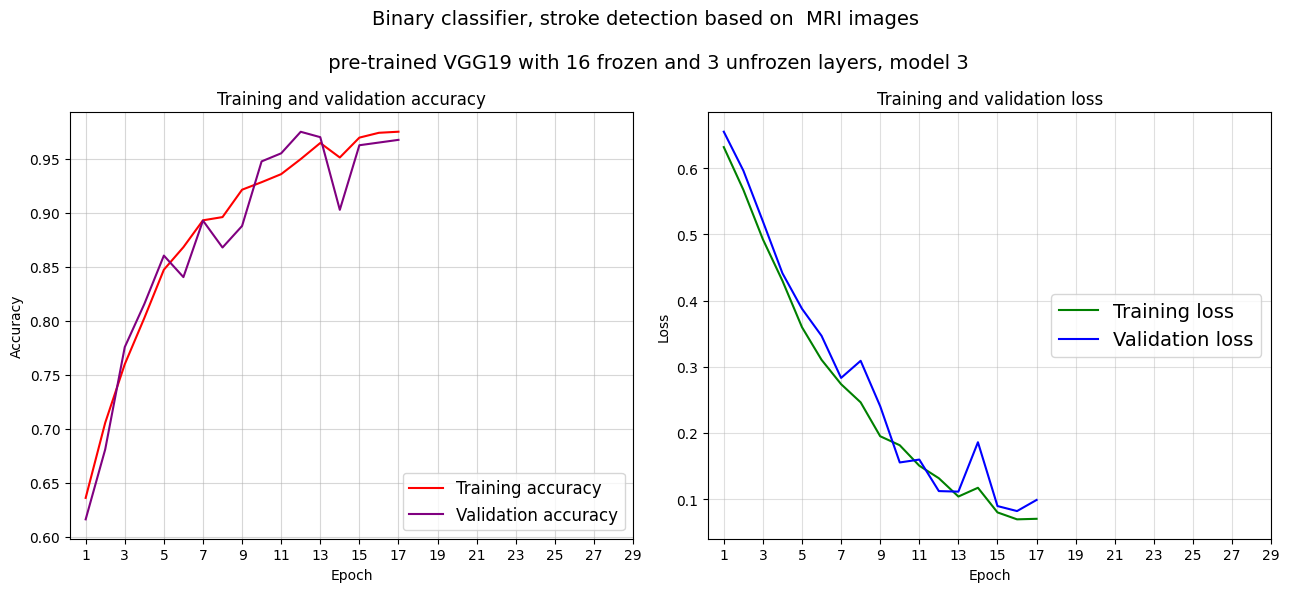

In [33]:
plot_loss_accuracy(history3, "pre-trained VGG19 with 16 frozen and 3 unfrozen layers, model 3")

model 3 outcome was a big improvement over previous models. improvement may continue if there were more epochs.

# MODEL 4

#### pretrained model: ResNet50, all frozen layers, model4

In [34]:
# instantiating ResNet50 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model4 = keras.applications.ResNet50(
    input_tensor = inputs, 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model4.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model4.summary()

In [35]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model4.get_layer('conv5_block3_out') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 2048)


In [36]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)  

In [37]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model4 = Model(pre_trained_model4.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model4.summary()

In [38]:
# ResNet and VGG preprocess_input will convert the input images from RGB to BGR, 
# then will zero-center each color channel with respect to the ImageNet dataset, without scaling
preprocess_input_resnet = tf.keras.applications.resnet.preprocess_input

# Rescaling the input image
train_datagen_resnet = ImageDataGenerator(preprocessing_function=preprocess_input_resnet)

validation_datagen_resnet = ImageDataGenerator(validation_split=0.2)

train_generator_resnet = train_datagen_resnet.flow_from_directory(
    data_dir_resized,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_resnet = validation_datagen_resnet.flow_from_directory(
    data_dir_resized,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [39]:
model4.compile(
    optimizer = Adam(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model4_adam.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history4 = model4.fit(
    train_generator_resnet,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_resnet,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 221s 644ms/step - binary_accuracy: 0.6927 - loss: 1.2370 - val_binary_accuracy: 0.7357 - val_loss: 0.6419
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 214s 638ms/step - binary_accuracy: 0.7795 - loss: 0.5146 - val_binary_accuracy: 0.7257 - val_loss: 0.7670
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 213s 637ms/step - binary_accuracy: 0.8297 - loss: 0.3740 - val_binary_accuracy: 0.8579 - val_loss: 0.3359
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 210s 626ms/step - binary_accuracy: 0.8381 - loss: 0.3815 - val_binary_accuracy: 0.8579 - val_loss: 0.3379
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 214s 639ms/step - binary_accuracy: 0.8552 - loss: 0.3490 - val_binary_accuracy: 0.8579 - val_loss: 0.3587
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 218s 651ms/step - binary_accuracy: 0.8720 - loss: 0.3076 - val_binary_accuracy: 0.8379 - val_loss: 0.4294
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 219s 653ms/step - binary_accuracy: 0.8933 - loss: 0.2469 - val_binary_accuracy: 0.7880 - val_lo

In [40]:
max(history4.history['val_binary_accuracy'])

0.8578553795814514

In [41]:
#the best model4
best_model4 = keras.models.load_model("model4_adam.keras") 
val_loss, val_binary_acc = best_model4.evaluate(validation_generator_resnet) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 32s 442ms/step - binary_accuracy: 0.8579 - loss: 0.3173
Validation accuracy: 0.858


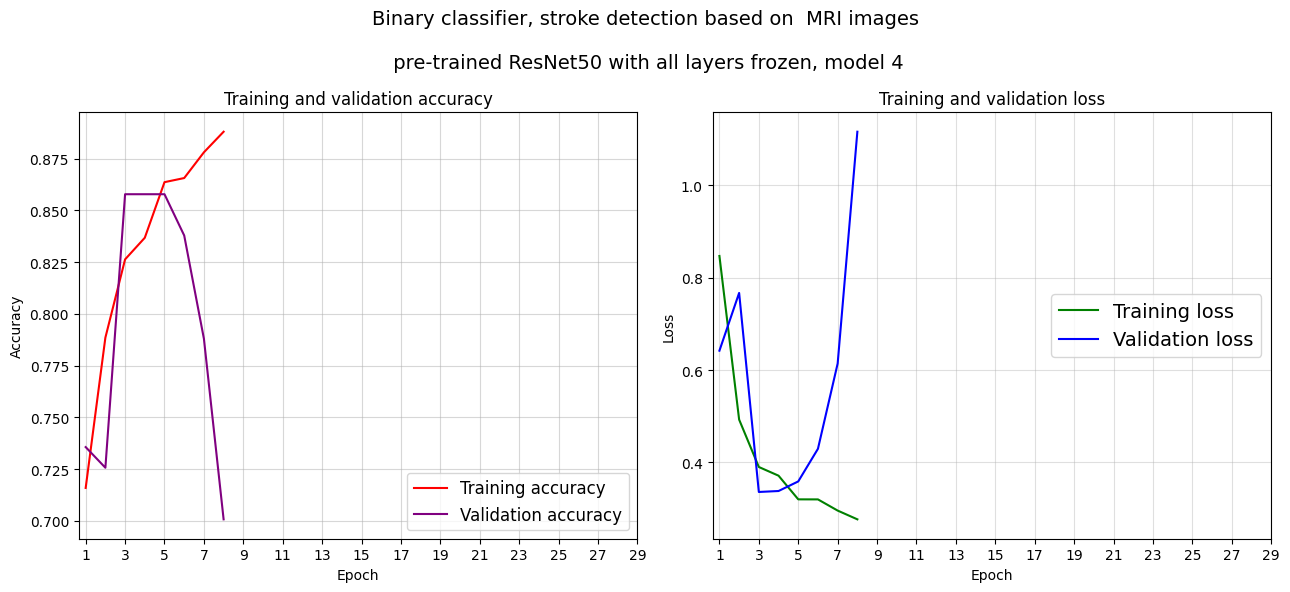

In [42]:
plot_loss_accuracy(history4, "pre-trained ResNet50 with all layers frozen, model 4")

model4 outcome was worse than baseline model0, no better than random chance

# MODEL 5

#### pretrained model: ResNet50, 3 unfrozen layers, model5

In [43]:
# instantiating ResNet50 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model5 = keras.applications.ResNet50(
    input_tensor = inputs, 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave last 3 trainable
pre_trained_model5.trainable = True
for layer in pre_trained_model5.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model5.summary()

In [44]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model5.get_layer('conv5_block3_out')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 2048)


In [45]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)  

In [46]:
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model5 = Model(pre_trained_model5.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model5.summary()

In [47]:
model5.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model5_adam.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history5 = model5.fit(
    train_generator_resnet,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_resnet,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 235s 685ms/step - binary_accuracy: 0.6268 - loss: 0.6794 - val_binary_accuracy: 0.7007 - val_loss: 0.6194
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 227s 676ms/step - binary_accuracy: 0.7947 - loss: 0.4479 - val_binary_accuracy: 0.7382 - val_loss: 0.5870
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 228s 682ms/step - binary_accuracy: 0.8078 - loss: 0.4152 - val_binary_accuracy: 0.7731 - val_loss: 0.6003
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 228s 682ms/step - binary_accuracy: 0.8477 - loss: 0.3401 - val_binary_accuracy: 0.7830 - val_loss: 0.5543
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 228s 679ms/step - binary_accuracy: 0.8770 - loss: 0.3064 - val_binary_accuracy: 0.7656 - val_loss: 0.6009
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 226s 676ms/step - binary_accuracy: 0.8889 - loss: 0.2809 - val_binary_accuracy: 0.7581 - val_loss: 0.7084
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 228s 681ms/step - binary_accuracy: 0.8982 - loss: 0.2569 - val_binary_accuracy: 0.7955 - val_lo

In [48]:
max(history5.history['val_binary_accuracy'])

0.8329176902770996

In [49]:
#the best model5
best_model5 = keras.models.load_model("model5_adam.keras") 
val_loss, val_binary_acc = best_model5.evaluate(validation_generator_resnet) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 378ms/step - binary_accuracy: 0.8428 - loss: 0.4711
Validation accuracy: 0.833


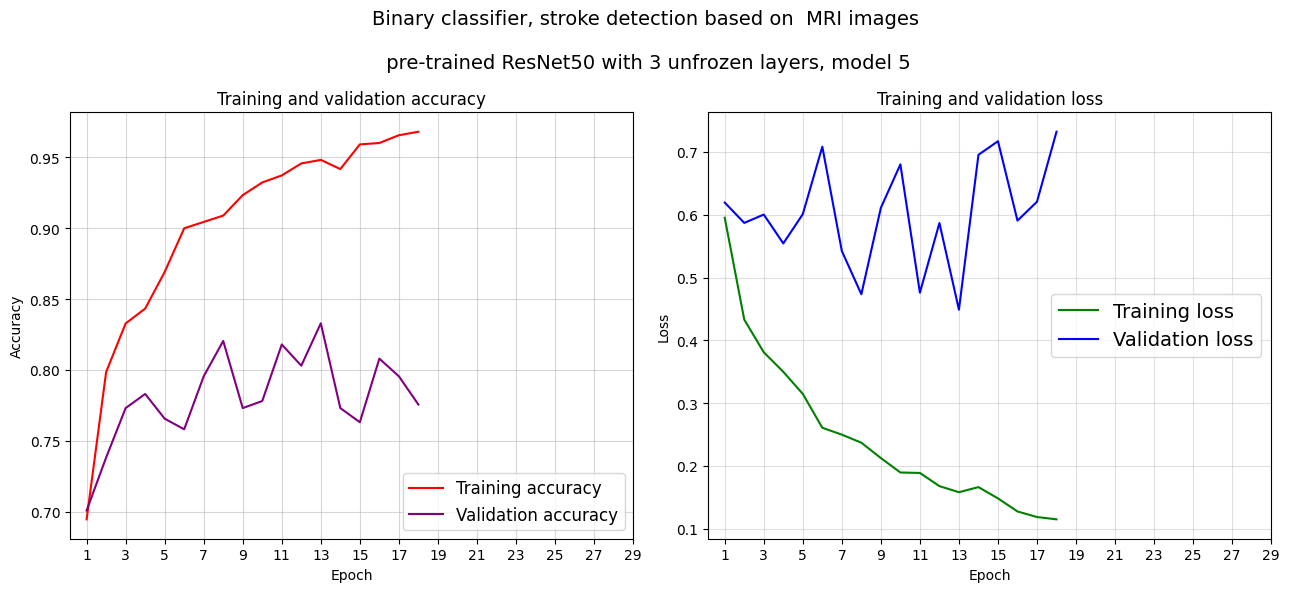

In [50]:
plot_loss_accuracy(history5, "pre-trained ResNet50 with 3 unfrozen layers, model 5")

model 5 performed worse than baseline

# MODEL 6

#### pretrained model: InceptionV3, all frozen layers, model6

In [51]:
# instantiating InceptionV3 convolutional base
pre_trained_model6 = keras.applications.InceptionV3(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model6.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model6.summary()

In [52]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model6.get_layer('mixed10')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [53]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [54]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model6 = Model(pre_trained_model6.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model6.summary()

In [55]:
# # Inceptionv3 preproces_input will scale input pixels between -1 and 1, 

# preprocess_input_inc = tf.keras.applications.inception_v3.preprocess_input

# # Rescaling the input image and Data Augmentation
# train_datagen_inc = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input_inc)

# validation_datagen_inc = ImageDataGenerator(rescale = 1./255, validation_split=0.2)


# train_generator_inc = train_datagen_inc.flow_from_directory(
#     data_dir,
#     target_size=(255,255),
#     class_mode='binary',
#     batch_size=6,
#     subset = "training")

# validation_generator_inc = validation_datagen_inc.flow_from_directory(
#     data_dir,
#     target_size=(255,255),
#     class_mode='binary',
#     batch_size=6,
#     subset = "validation")

In [56]:
model6.compile(
    optimizer = Adam(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model6_adam.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history6 = model6.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 158s 457ms/step - binary_accuracy: 0.6633 - loss: 1.9244 - val_binary_accuracy: 0.8279 - val_loss: 0.4355
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 155s 463ms/step - binary_accuracy: 0.8182 - loss: 0.4040 - val_binary_accuracy: 0.8404 - val_loss: 0.3841
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 152s 451ms/step - binary_accuracy: 0.8514 - loss: 0.3415 - val_binary_accuracy: 0.8628 - val_loss: 0.3787
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 148s 440ms/step - binary_accuracy: 0.8710 - loss: 0.3164 - val_binary_accuracy: 0.8728 - val_loss: 0.3296
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 154s 458ms/step - binary_accuracy: 0.8849 - loss: 0.2728 - val_binary_accuracy: 0.8204 - val_loss: 0.5500
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 157s 467ms/step - binary_accuracy: 0.9182 - loss: 0.2017 - val_binary_accuracy: 0.8229 - val_loss: 0.6101
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 152s 452ms/step - binary_accuracy: 0.9317 - loss: 0.1592 - val_binary_accuracy: 0.8653 - val_lo

In [57]:
max(history6.history['val_binary_accuracy'])

0.885286808013916

In [59]:
#the best model6
best_model6 = keras.models.load_model("model6_adam.keras") 
val_loss, val_binary_acc = best_model6.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 23s 309ms/step - binary_accuracy: 0.8873 - loss: 0.3088
Validation accuracy: 0.885


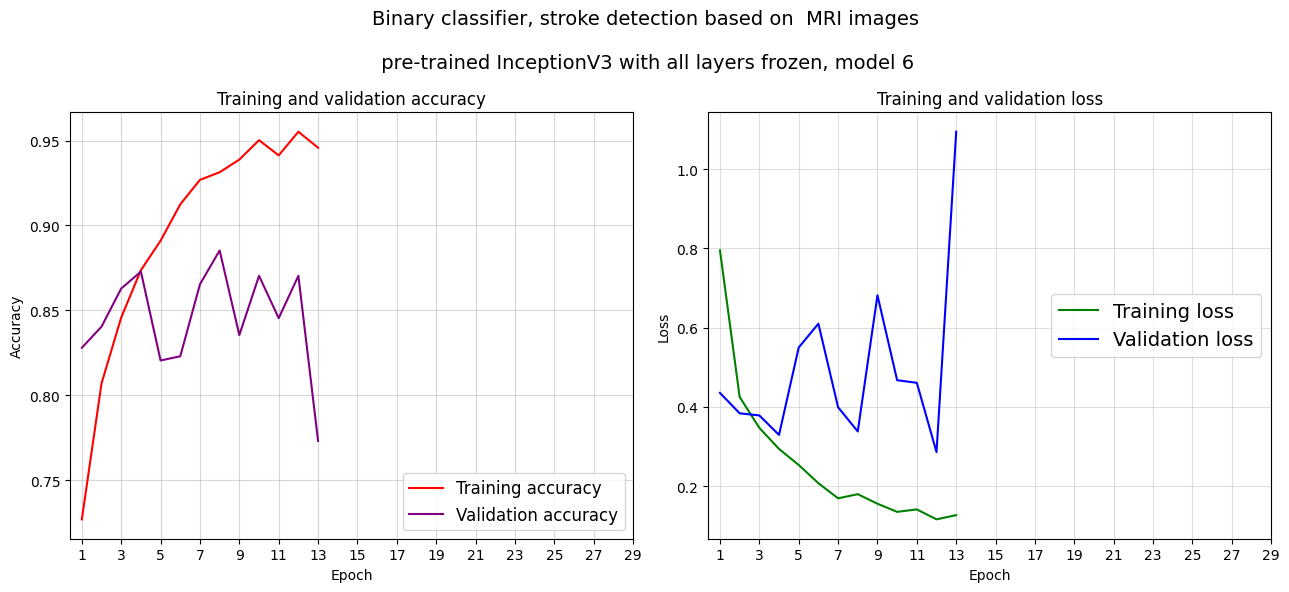

In [60]:
plot_loss_accuracy(history6, "pre-trained InceptionV3 with all layers frozen, model 6")

model 6 is an improvement over the baseline, achieving around 85% accuracy

# MODEL 7

#### pretrained model: InceptionV3, 3 unfrozen layers, model7

In [61]:
# instantiating InceptionV3 convolutional base
pre_trained_model7 = keras.applications.InceptionV3(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# # Freeze the weights, leave last 3 trainable
# pre_trained_model7.trainable = True
# for layer in pre_trained_model7.layers[:-4]:  # loop through all but the last three layers
#     layer.trainable = False  # make them not trainable

# Freeze the weights, leave 25 trainable, but not Batchnomalization
# pre_trained_model7.trainable = True
for layer in pre_trained_model7.layers[-13:]:  # loop through all but the last 25 layers
    if not isinstance(layer,layers.BatchNormalization):
        layer.trainable = True  # make them trainable

# printing out the summary of the pretrained model
# pre_trained_model7.summary()

In [62]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model7.get_layer('mixed10') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [63]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [64]:
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model7 = Model(pre_trained_model7.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model7.summary()

In [88]:
model7.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model7_adam.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history7 = model7.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 578s 2s/step - binary_accuracy: 0.9776 - loss: 0.0761 - val_binary_accuracy: 0.5012 - val_loss: 1.4288
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 514s 2s/step - binary_accuracy: 0.9664 - loss: 0.0823 - val_binary_accuracy: 0.4988 - val_loss: 1.3530
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 322s 960ms/step - binary_accuracy: 0.9794 - loss: 0.0643 - val_binary_accuracy: 0.5012 - val_loss: 1.4072
Epoch 4/30
 58/335 ━━━━━━━━━━━━━━━━━━━━ 4:10 906ms/step - binary_accuracy: 0.9662 - loss: 0.0889

: 

In [66]:
max(history7.history['val_binary_accuracy'])

0.6109725832939148

In [67]:
#the best model7
best_model7 = keras.models.load_model("model7_adam.keras") 
val_loss, val_binary_acc = best_model7.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 239ms/step - binary_accuracy: 0.6264 - loss: 0.6558
Validation accuracy: 0.611


In [68]:
max(history7.history['val_binary_accuracy'])

0.6109725832939148

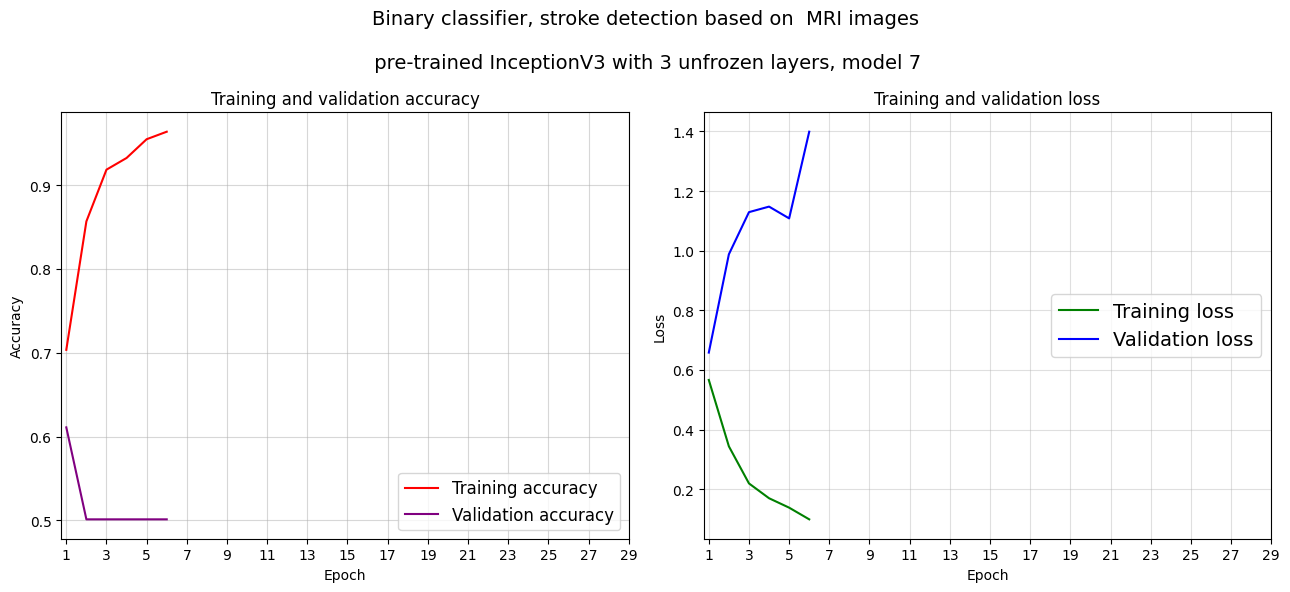

In [69]:
plot_loss_accuracy(history7, "pre-trained InceptionV3 with 3 unfrozen layers, model 7")

model7 is very similar to model 6, improvement over baseline. training last 3 layers does not seem to add

# MODEL 8

#### pretrained model: EfficientNetB0, all frozen layers, model8

In [70]:
# instantiating EfficientNetB0 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model8 = keras.applications.EfficientNetB0(
    # input_shape = (224, 224, 3), 
    input_tensor = inputs,
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model8.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model8.summary()

In [71]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model8.get_layer('top_activation')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1280)


In [72]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
x = layers.BatchNormalization()(x)

# # Add a dropout rate of 0.2
x = layers.Dropout(0.2, name="top_dropout")(x)  

In [73]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid', name="pred")(x)           

# Append the dense network to the base model
model8 = Model(pre_trained_model8.input, outputs, name="EfficientNetB0") 

# Print the model summary. See your dense network connected at the end.
# model8.summary()

In [74]:
# from PIL import Image                                              
# import os, sys                       

# path = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Resize /Stroke/'
# dirs = os.listdir( path )                                      

# def resize(width, height):
# 	for item in dirs:
# 		if item == '.DS_Store':
# 			continue
# 		if os.path.isfile(path + item):
# 			img = Image.open(path + item)
# 			new_image = img.resize((width, height))
# 			new_file_name = 'resized-' + item
# 			new_image.save(path + new_file_name)

# resize(224, 224)

In [75]:
# EfficientNet preprocess_input is a pass-through function. 
# EfficientNet models expect their inputs to be float tensors of pixels with values in the [0-255] range

preprocess_input_en = tf.keras.applications.efficientnet.preprocess_input

# Rescaling the input image and Data Augmentation
train_datagen_en = ImageDataGenerator(preprocessing_function=preprocess_input_en)

validation_datagen_en = ImageDataGenerator(validation_split=0.2)

train_generator_en = train_datagen_en.flow_from_directory(
    data_dir,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_en = validation_datagen_en.flow_from_directory(
    data_dir,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.


Found 401 images belonging to 2 classes.


In [76]:
model8.compile(
    optimizer = Adam(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model8_adam.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history8 = model8.fit(
    train_generator_en,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_en,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 73s 202ms/step - binary_accuracy: 0.6720 - loss: 1.5192 - val_binary_accuracy: 0.7232 - val_loss: 0.7098
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 64s 190ms/step - binary_accuracy: 0.7657 - loss: 0.6351 - val_binary_accuracy: 0.8204 - val_loss: 0.4253
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 66s 196ms/step - binary_accuracy: 0.7801 - loss: 0.5192 - val_binary_accuracy: 0.7307 - val_loss: 0.5986
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 67s 200ms/step - binary_accuracy: 0.8018 - loss: 0.4235 - val_binary_accuracy: 0.8603 - val_loss: 0.2990
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 66s 196ms/step - binary_accuracy: 0.8223 - loss: 0.3976 - val_binary_accuracy: 0.8379 - val_loss: 0.3571
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 66s 197ms/step - binary_accuracy: 0.8388 - loss: 0.3785 - val_binary_accuracy: 0.9052 - val_loss: 0.2597
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 68s 201ms/step - binary_accuracy: 0.8404 - loss: 0.3620 - val_binary_accuracy: 0.9027 - val_loss: 0.2

In [77]:
max(history8.history['val_binary_accuracy'])

0.942643404006958

In [78]:
#the best model8
best_model8 = keras.models.load_model("model8_adam.keras") 
val_loss, val_binary_acc = best_model8.evaluate(validation_generator_en) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - binary_accuracy: 0.7121 - loss: 0.7612
Validation accuracy: 0.728


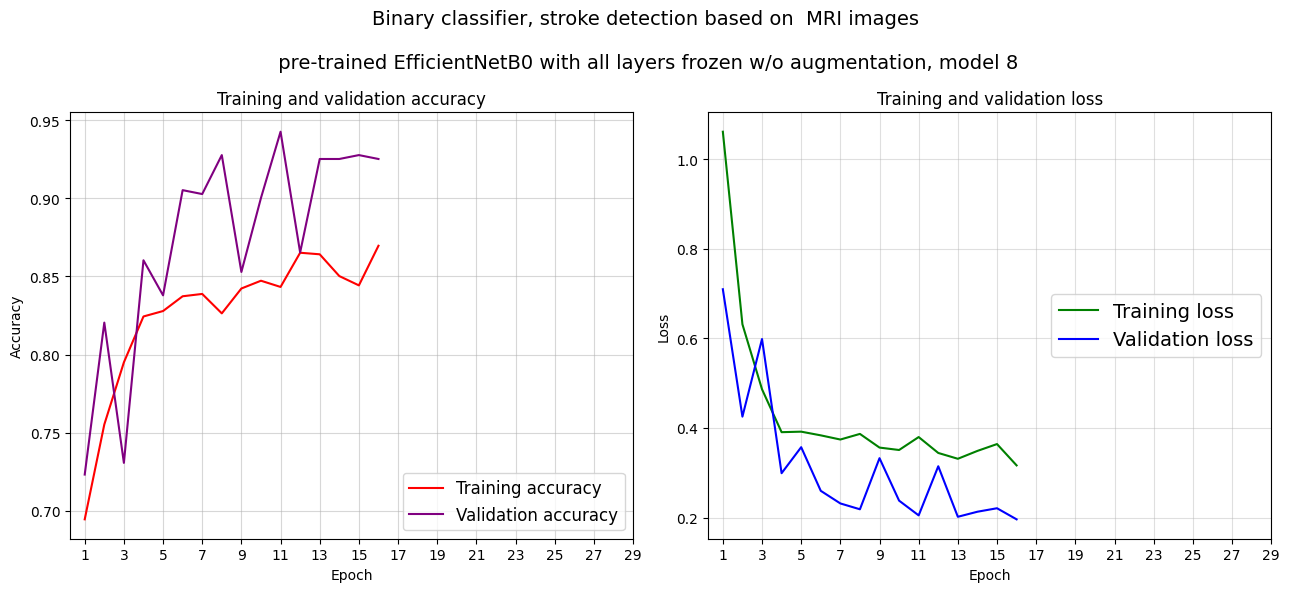

In [79]:
plot_loss_accuracy(history8, "pre-trained EfficientNetB0 with all layers frozen w/o augmentation, model 8")

# MODEL 8 OUTCOME

# MODEL 9

#### pretrained model: EfficientNetB0, 20 unfrozen layers, model9

In [80]:
# instantiating EfficientNetB0 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model9 = keras.applications.EfficientNetB0(
    input_tensor = inputs,
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave 20 trainable, but not Batchnomalization
# pre_trained_model9.trainable = True
for layer in pre_trained_model9.layers[-20:]:  # loop through all but the last 20 layers
    if not isinstance(layer,layers.BatchNormalization):
        layer.trainable = True  # make them trainable

# printing out the summary of the pretrained model
# pre_trained_model9.summary()

In [81]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model9.get_layer('top_activation') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1280)


In [82]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
x = layers.BatchNormalization()(x)

# # Add a dropout rate of 0.2
x = layers.Dropout(0.2, name="top_dropout")(x)  

In [83]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid', name="pred")(x)           

# Append the dense network to the base model
model9 = Model(pre_trained_model9.input, outputs, name="EfficientNetB0") 

# Print the model summary. See your dense network connected at the end.
# model9.summary()

In [84]:
model9.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model9_adam.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history9 = model9.fit(
    train_generator_en,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_en,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 200s 539ms/step - binary_accuracy: 0.6630 - loss: 0.7031 - val_binary_accuracy: 0.6908 - val_loss: 0.5844
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 185s 551ms/step - binary_accuracy: 0.7654 - loss: 0.5322 - val_binary_accuracy: 0.6858 - val_loss: 0.6593
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 152s 453ms/step - binary_accuracy: 0.7744 - loss: 0.4590 - val_binary_accuracy: 0.8155 - val_loss: 0.4124
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 156s 463ms/step - binary_accuracy: 0.7986 - loss: 0.4357 - val_binary_accuracy: 0.8803 - val_loss: 0.2913
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 153s 455ms/step - binary_accuracy: 0.8564 - loss: 0.3481 - val_binary_accuracy: 0.8803 - val_loss: 0.2408
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 153s 455ms/step - binary_accuracy: 0.8632 - loss: 0.3206 - val_binary_accuracy: 0.8853 - val_loss: 0.2784
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 154s 458ms/step - binary_accuracy: 0.8642 - loss: 0.3202 - val_binary_accuracy: 0.90

In [ ]:
len(model.layers)

In [85]:
max(history9.history['val_binary_accuracy'])

1.0

In [86]:
#the best model9
best_model9 = keras.models.load_model("model9_adam.keras") 
val_loss, val_binary_acc = best_model9.evaluate(validation_generator_en) 
val_binary_acc
# print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 183ms/step - binary_accuracy: 0.4674 - loss: 8856.4072


0.4862842857837677

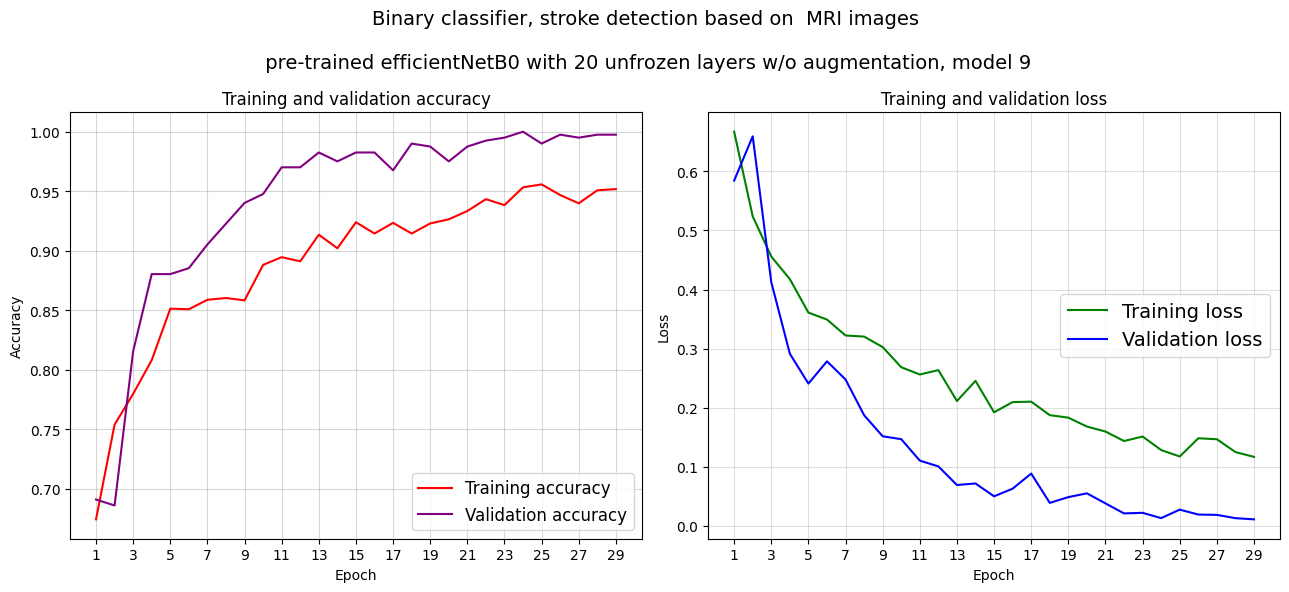

In [87]:
plot_loss_accuracy(history9, "pre-trained efficientNetB0 with 20 unfrozen layers w/o augmentation, model 9")

# MODEL 9 OUTCOME